In [382]:
import numpy as np
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

In [193]:
df = pd.read_csv('selected_route_18.csv', sep=',', parse_dates = ['date_time'], index_col = ['date_time'])
#df.dropna(axis=0, how='any', inplace=True)

df

,osm_id,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop
date_time,,,,,,,,,,,,
2018-01-01 00:00:00,14904476,1,33,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 00:00:00,174486699,1,26,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,146,no
2018-01-01 00:00:00,302472924,1,28,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,88,no
2018-01-01 00:15:00,14904476,1,20,00:15,0,15,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 00:15:00,35355049,1,41,00:15,0,15,MONDAY,CLOSED,JANUARY,primary,165,no
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-01 00:00:00,14904476,1,35,00:00,0,0,TUESDAY,CLOSED,JANUARY,primary,96,no
2019-01-01 00:00:00,112282656,1,41,00:00,0,0,TUESDAY,CLOSED,JANUARY,primary,398,yes
2019-01-01 00:00:00,174486699,1,27,00:00,0,0,TUESDAY,CLOSED,JANUARY,primary,146,no


In [194]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218289 entries, 2018-01-01 00:00:00 to 2019-01-01 00:00:00
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   osm_id      218289 non-null  int64 
 1   link_dir    218289 non-null  int64 
 2   speed_kmph  218289 non-null  int64 
 3   n_time      218289 non-null  object
 4   hours       218289 non-null  int64 
 5   mins        218289 non-null  int64 
 6   n_day       218289 non-null  object
 7   stores      218289 non-null  object
 8   n_month     218289 non-null  object
 9   highway     218289 non-null  object
 10  road_lt_m   218289 non-null  int64 
 11  bus_stop    218289 non-null  object
dtypes: int64(6), object(6)
memory usage: 21.7+ MB


,osm_id,link_dir,speed_kmph,hours,mins,road_lt_m
count,2.182890e+05,218289.0,218289.000000,218289.000000,218289.000000,218289.000000
mean,1.675323e+08,1.0,27.080421,11.707214,22.501890,156.492045
std,1.398803e+08,0.0,8.890819,6.915418,16.781208,107.584584
min,1.490448e+07,1.0,1.000000,0.000000,0.000000,61.000000
25%,3.535505e+07,1.0,21.000000,6.000000,0.000000,88.000000
50%,1.133421e+08,1.0,27.000000,12.000000,30.000000,107.000000
75%,3.024729e+08,1.0,33.000000,18.000000,45.000000,165.000000
max,4.421675e+08,1.0,114.000000,23.000000,45.000000,398.000000


In [195]:
df.groupby("osm_id")["speed_kmph"].describe()

,count,mean,std,min,25%,50%,75%,max
osm_id,,,,,,,,
14904476,31965.0,28.165056,9.479699,1.0,22.0,28.0,34.0,74.0
35355049,33247.0,26.996240,7.610065,1.0,22.0,26.0,32.0,77.0
112282656,33414.0,30.797001,7.386731,1.0,26.0,31.0,35.0,68.0
113342145,25586.0,25.361799,10.578365,1.0,18.0,25.0,32.0,78.0
174486699,33067.0,24.872925,8.321560,1.0,19.0,24.0,30.0,114.0
302472924,32067.0,25.818754,8.771372,1.0,20.0,25.0,31.0,76.0
442167476,28943.0,27.127699,8.771834,1.0,21.0,27.0,32.0,75.0


In [196]:
df['highway'].value_counts()

primary    218289
Name: highway, dtype: int64

In [197]:
print(df['highway'].unique())

['primary']


In [198]:
osm=df['osm_id'].unique()
print(osm)

[ 14904476 174486699 302472924  35355049 112282656 113342145 442167476]


In [199]:
segments={}
for i in range(len(osm)):
    segments['segment{}'.format(i+1)]=df[df['osm_id']==osm[i]]

In [108]:
#plt.plot(df.speed_kmph)
#plt.xlim([0, 14])

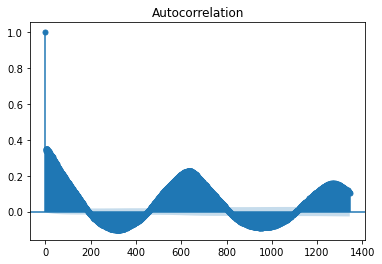

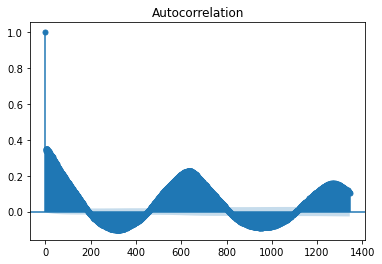

In [21]:
plot_acf(df.speed_kmph,lags=1344)

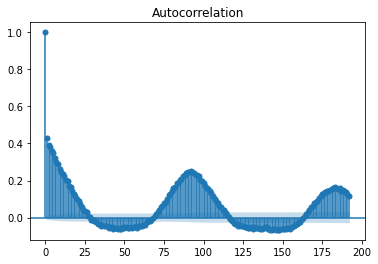

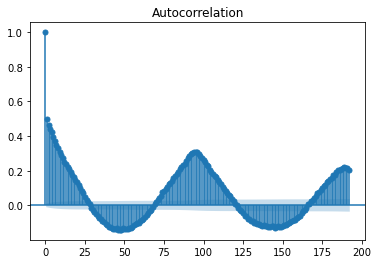

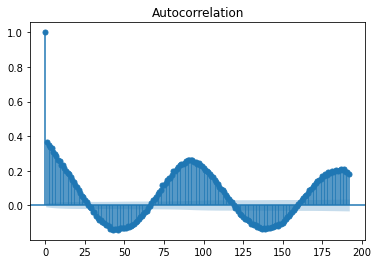

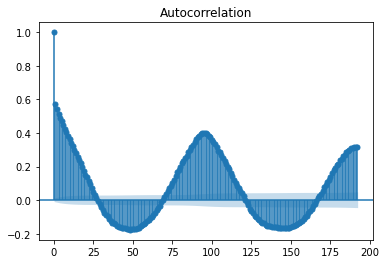

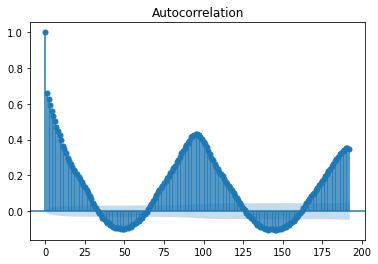

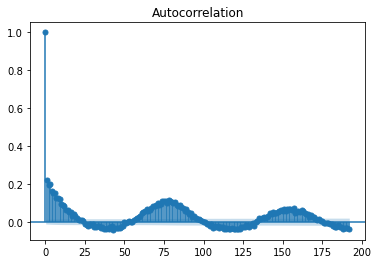

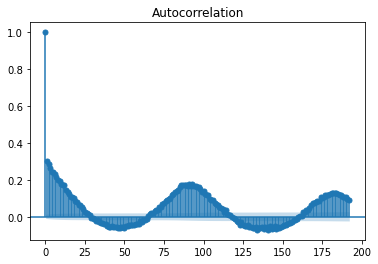

In [50]:
for name,seg in segments.items():
    plot_acf(seg.speed_kmph,lags=3072)

In [200]:
segments["segment1"].describe()

,osm_id,link_dir,speed_kmph,hours,mins,road_lt_m
count,31965.0,31965.0,31965.000000,31965.000000,31965.000000,31965.0
mean,14904476.0,1.0,28.165056,11.731206,22.552792,96.0
std,0.0,0.0,9.479699,6.931735,16.783067,0.0
min,14904476.0,1.0,1.000000,0.000000,0.000000,96.0
25%,14904476.0,1.0,22.000000,6.000000,15.000000,96.0
50%,14904476.0,1.0,28.000000,12.000000,30.000000,96.0
75%,14904476.0,1.0,34.000000,18.000000,45.000000,96.0
max,14904476.0,1.0,74.000000,23.000000,45.000000,96.0


In [201]:
dfs=segments["segment1"]
dfs

,osm_id,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop
date_time,,,,,,,,,,,,
2018-01-01 00:00:00,14904476,1,33,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 00:15:00,14904476,1,20,00:15,0,15,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 00:45:00,14904476,1,32,00:45,0,45,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 01:00:00,14904476,1,12,01:00,1,0,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 01:15:00,14904476,1,9,01:15,1,15,MONDAY,CLOSED,JANUARY,primary,96,no
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,14904476,1,38,23:00,23,0,MONDAY,CLOSED,DECEMBER,primary,96,no
2018-12-31 23:15:00,14904476,1,26,23:15,23,15,MONDAY,CLOSED,DECEMBER,primary,96,no
2018-12-31 23:30:00,14904476,1,29,23:30,23,30,MONDAY,CLOSED,DECEMBER,primary,96,no


In [100]:
#dfs['date_time'] = dfs['date_time'].astype('datetime64[ns]')

SyntaxError: invalid syntax (<ipython-input-100-6ca122ffcb2d>, line 2)

In [132]:
#times=pd.date_range(start="2018-01-01 00:00:00", end="2019-01-01 00:00:00", freq="15T")

In [133]:
3type(times)

pandas.core.indexes.datetimes.DatetimeIndex

pandas.core.resample.DatetimeIndexResampler

In [202]:
dfs

,osm_id,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop
date_time,,,,,,,,,,,,
2018-01-01 00:00:00,14904476,1,33,00:00,0,0,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 00:15:00,14904476,1,20,00:15,0,15,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 00:45:00,14904476,1,32,00:45,0,45,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 01:00:00,14904476,1,12,01:00,1,0,MONDAY,CLOSED,JANUARY,primary,96,no
2018-01-01 01:15:00,14904476,1,9,01:15,1,15,MONDAY,CLOSED,JANUARY,primary,96,no
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,14904476,1,38,23:00,23,0,MONDAY,CLOSED,DECEMBER,primary,96,no
2018-12-31 23:15:00,14904476,1,26,23:15,23,15,MONDAY,CLOSED,DECEMBER,primary,96,no
2018-12-31 23:30:00,14904476,1,29,23:30,23,30,MONDAY,CLOSED,DECEMBER,primary,96,no


In [203]:
dfs['n_day'] = LabelEncoder().fit_transform(dfs['n_day'])
dfs['n_month'] = LabelEncoder().fit_transform(dfs['n_month'])
dfs['stores'] = LabelEncoder().fit_transform(dfs['stores'])
#df['highway_n'] = LabelEncoder().fit_transform(df['highway'])
dfs['bus_stop'] = LabelEncoder().fit_transform(dfs['bus_stop'])
dfs

,osm_id,link_dir,speed_kmph,n_time,hours,mins,n_day,stores,n_month,highway,road_lt_m,bus_stop
date_time,,,,,,,,,,,,
2018-01-01 00:00:00,14904476,1,33,00:00,0,0,1,0,4,primary,96,0
2018-01-01 00:15:00,14904476,1,20,00:15,0,15,1,0,4,primary,96,0
2018-01-01 00:45:00,14904476,1,32,00:45,0,45,1,0,4,primary,96,0
2018-01-01 01:00:00,14904476,1,12,01:00,1,0,1,0,4,primary,96,0
2018-01-01 01:15:00,14904476,1,9,01:15,1,15,1,0,4,primary,96,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-31 23:00:00,14904476,1,38,23:00,23,0,1,0,2,primary,96,0
2018-12-31 23:15:00,14904476,1,26,23:15,23,15,1,0,2,primary,96,0
2018-12-31 23:30:00,14904476,1,29,23:30,23,30,1,0,2,primary,96,0


In [204]:
dfs=dfs.resample('15T', base=15).mean()

In [205]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2018-01-01 00:00:00 to 2019-01-01 00:00:00
Freq: 15T
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   osm_id      31955 non-null  float64
 1   link_dir    31955 non-null  float64
 2   speed_kmph  31955 non-null  float64
 3   hours       31955 non-null  float64
 4   mins        31955 non-null  float64
 5   n_day       31955 non-null  float64
 6   stores      31955 non-null  float64
 7   n_month     31955 non-null  float64
 8   road_lt_m   31955 non-null  float64
 9   bus_stop    31955 non-null  float64
dtypes: float64(10)
memory usage: 2.9 MB


In [206]:
dfs.drop(columns=["hours","mins","n_day"],inplace=True)

In [207]:
dfs

,osm_id,link_dir,speed_kmph,stores,n_month,road_lt_m,bus_stop
date_time,,,,,,,
2018-01-01 00:00:00,14904476.0,1.0,33.0,0.0,4.0,96.0,0.0
2018-01-01 00:15:00,14904476.0,1.0,20.0,0.0,4.0,96.0,0.0
2018-01-01 00:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01 00:45:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0
2018-01-01 01:00:00,14904476.0,1.0,12.0,0.0,4.0,96.0,0.0
...,...,...,...,...,...,...,...
2018-12-31 23:00:00,14904476.0,1.0,38.0,0.0,2.0,96.0,0.0
2018-12-31 23:15:00,14904476.0,1.0,26.0,0.0,2.0,96.0,0.0
2018-12-31 23:30:00,14904476.0,1.0,29.0,0.0,2.0,96.0,0.0


In [208]:
dfs = dfs.bfill()

In [209]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35041 entries, 2018-01-01 00:00:00 to 2019-01-01 00:00:00
Freq: 15T
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   osm_id      35041 non-null  float64
 1   link_dir    35041 non-null  float64
 2   speed_kmph  35041 non-null  float64
 3   stores      35041 non-null  float64
 4   n_month     35041 non-null  float64
 5   road_lt_m   35041 non-null  float64
 6   bus_stop    35041 non-null  float64
dtypes: float64(7)
memory usage: 2.1 MB


In [210]:
dfs

,osm_id,link_dir,speed_kmph,stores,n_month,road_lt_m,bus_stop
date_time,,,,,,,
2018-01-01 00:00:00,14904476.0,1.0,33.0,0.0,4.0,96.0,0.0
2018-01-01 00:15:00,14904476.0,1.0,20.0,0.0,4.0,96.0,0.0
2018-01-01 00:30:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0
2018-01-01 00:45:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0
2018-01-01 01:00:00,14904476.0,1.0,12.0,0.0,4.0,96.0,0.0
...,...,...,...,...,...,...,...
2018-12-31 23:00:00,14904476.0,1.0,38.0,0.0,2.0,96.0,0.0
2018-12-31 23:15:00,14904476.0,1.0,26.0,0.0,2.0,96.0,0.0
2018-12-31 23:30:00,14904476.0,1.0,29.0,0.0,2.0,96.0,0.0


In [211]:
dfs.reset_index(inplace=True)

In [212]:
dfs

,date_time,osm_id,link_dir,speed_kmph,stores,n_month,road_lt_m,bus_stop
0,2018-01-01 00:00:00,14904476.0,1.0,33.0,0.0,4.0,96.0,0.0
1,2018-01-01 00:15:00,14904476.0,1.0,20.0,0.0,4.0,96.0,0.0
2,2018-01-01 00:30:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0
3,2018-01-01 00:45:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0
4,2018-01-01 01:00:00,14904476.0,1.0,12.0,0.0,4.0,96.0,0.0
...,...,...,...,...,...,...,...,...
35036,2018-12-31 23:00:00,14904476.0,1.0,38.0,0.0,2.0,96.0,0.0
35037,2018-12-31 23:15:00,14904476.0,1.0,26.0,0.0,2.0,96.0,0.0
35038,2018-12-31 23:30:00,14904476.0,1.0,29.0,0.0,2.0,96.0,0.0
35039,2018-12-31 23:45:00,14904476.0,1.0,34.0,0.0,2.0,96.0,0.0


In [213]:
dfs["hour"]=dfs["date_time"].dt.hour

In [214]:
dfs

,date_time,osm_id,link_dir,speed_kmph,stores,n_month,road_lt_m,bus_stop,hour
0,2018-01-01 00:00:00,14904476.0,1.0,33.0,0.0,4.0,96.0,0.0,0
1,2018-01-01 00:15:00,14904476.0,1.0,20.0,0.0,4.0,96.0,0.0,0
2,2018-01-01 00:30:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0,0
3,2018-01-01 00:45:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0,0
4,2018-01-01 01:00:00,14904476.0,1.0,12.0,0.0,4.0,96.0,0.0,1
...,...,...,...,...,...,...,...,...,...
35036,2018-12-31 23:00:00,14904476.0,1.0,38.0,0.0,2.0,96.0,0.0,23
35037,2018-12-31 23:15:00,14904476.0,1.0,26.0,0.0,2.0,96.0,0.0,23
35038,2018-12-31 23:30:00,14904476.0,1.0,29.0,0.0,2.0,96.0,0.0,23
35039,2018-12-31 23:45:00,14904476.0,1.0,34.0,0.0,2.0,96.0,0.0,23


In [215]:
dfs["min"]=dfs["date_time"].dt.minute
dfs["day"]=dfs["date_time"].dt.day

In [216]:
dfs

,date_time,osm_id,link_dir,speed_kmph,stores,n_month,road_lt_m,bus_stop,hour,min,day
0,2018-01-01 00:00:00,14904476.0,1.0,33.0,0.0,4.0,96.0,0.0,0,0,1
1,2018-01-01 00:15:00,14904476.0,1.0,20.0,0.0,4.0,96.0,0.0,0,15,1
2,2018-01-01 00:30:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0,0,30,1
3,2018-01-01 00:45:00,14904476.0,1.0,32.0,0.0,4.0,96.0,0.0,0,45,1
4,2018-01-01 01:00:00,14904476.0,1.0,12.0,0.0,4.0,96.0,0.0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
35036,2018-12-31 23:00:00,14904476.0,1.0,38.0,0.0,2.0,96.0,0.0,23,0,31
35037,2018-12-31 23:15:00,14904476.0,1.0,26.0,0.0,2.0,96.0,0.0,23,15,31
35038,2018-12-31 23:30:00,14904476.0,1.0,29.0,0.0,2.0,96.0,0.0,23,30,31
35039,2018-12-31 23:45:00,14904476.0,1.0,34.0,0.0,2.0,96.0,0.0,23,45,31


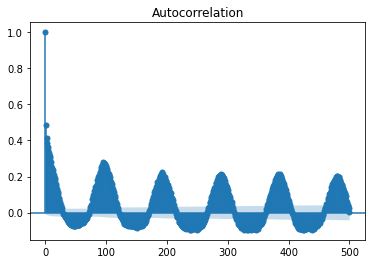

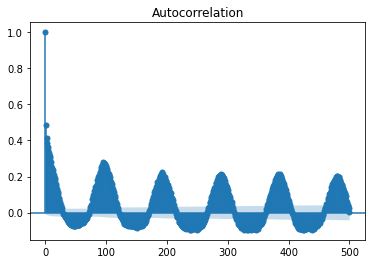

In [218]:
plot_acf(dfs.speed_kmph,lags=500)

In [226]:
print(dfs["bus_stop"].unique())
print(dfs["bus_stop"].unique())
print(dfs["stores"].unique())

[0.]
[0.]
[0. 3. 2. 1.]


In [225]:
dfs.describe()

,osm_id,link_dir,speed_kmph,stores,n_month,road_lt_m,bus_stop,hour,min,day
count,35041.0,35041.0,35041.000000,35041.000000,35041.000000,35041.0,35041.0,35041.000000,35041.000000,35041.000000
mean,14904476.0,1.0,28.353015,0.955367,5.509546,96.0,0.0,11.499672,22.499358,15.720128
std,0.0,0.0,9.528534,1.054618,3.448740,0.0,0.0,6.922459,16.770941,8.796599
min,14904476.0,1.0,1.000000,0.000000,0.000000,96.0,0.0,0.000000,0.000000,1.000000
25%,14904476.0,1.0,22.000000,0.000000,2.000000,96.0,0.0,5.000000,0.000000,8.000000
50%,14904476.0,1.0,28.000000,0.000000,6.000000,96.0,0.0,11.000000,15.000000,16.000000
75%,14904476.0,1.0,34.000000,2.000000,8.000000,96.0,0.0,17.000000,30.000000,23.000000
max,14904476.0,1.0,74.000000,3.000000,11.000000,96.0,0.0,23.000000,45.000000,31.000000


In [445]:
data_features = ['hour','day','stores']
X = dfs[data_features]

In [446]:
X

,hour,day,stores
0,0,1,0.0
1,0,1,0.0
2,0,1,0.0
3,0,1,0.0
4,1,1,0.0
...,...,...,...
35036,23,31,0.0
35037,23,31,0.0
35038,23,31,0.0
35039,23,31,0.0


In [447]:
Y=dfs["speed_kmph"]

In [448]:
Y.shape

(35041,)

In [449]:
X.shape

(35041, 3)

In [450]:
X=X[3:X.shape[0]].reset_index(drop=True)

In [451]:
X.shape

(35038, 3)

In [452]:
X

,hour,day,stores
0,0,1,0.0
1,1,1,0.0
2,1,1,0.0
3,1,1,0.0
4,1,1,0.0
...,...,...,...
35033,23,31,0.0
35034,23,31,0.0
35035,23,31,0.0
35036,23,31,0.0


In [453]:
Y_tag=Y[3:Y.shape[0]].reset_index(drop=True)

In [454]:
Y_tag

0        32.0
1        12.0
2         9.0
3        18.0
4        15.0
         ... 
35033    38.0
35034    26.0
35035    29.0
35036    34.0
35037    35.0
Name: speed_kmph, Length: 35038, dtype: float64

In [455]:
Y_tag.shape

(35038,)

In [456]:
ylag1=Y[2:Y.shape[0]-1].reset_index(drop=True)
ylag2=Y[1:Y.shape[0]-2].reset_index(drop=True)
ylag3=Y[0:Y.shape[0]-3].reset_index(drop=True)

In [457]:
ylag3

0        33.0
1        20.0
2        32.0
3        32.0
4        12.0
         ... 
35033    39.0
35034    38.0
35035    36.0
35036    38.0
35037    26.0
Name: speed_kmph, Length: 35038, dtype: float64

In [458]:
X

,hour,day,stores
0,0,1,0.0
1,1,1,0.0
2,1,1,0.0
3,1,1,0.0
4,1,1,0.0
...,...,...,...
35033,23,31,0.0
35034,23,31,0.0
35035,23,31,0.0
35036,23,31,0.0


In [459]:
X["y-3"]=ylag3
X["y-2"]=ylag2
X["y-1"]=ylag1

In [460]:
X

,hour,day,stores,y-3,y-2,y-1
0,0,1,0.0,33.0,20.0,32.0
1,1,1,0.0,20.0,32.0,32.0
2,1,1,0.0,32.0,32.0,12.0
3,1,1,0.0,32.0,12.0,9.0
4,1,1,0.0,12.0,9.0,18.0
...,...,...,...,...,...,...
35033,23,31,0.0,39.0,38.0,36.0
35034,23,31,0.0,38.0,36.0,38.0
35035,23,31,0.0,36.0,38.0,26.0
35036,23,31,0.0,38.0,26.0,29.0


In [461]:
Y_tag

0        32.0
1        12.0
2         9.0
3        18.0
4        15.0
         ... 
35033    38.0
35034    26.0
35035    29.0
35036    34.0
35037    35.0
Name: speed_kmph, Length: 35038, dtype: float64

In [462]:
print(X.shape)
print(Y_tag.shape)

(35038, 6)
(35038,)


In [463]:
train_X, val_X, train_y, val_y=X[:round(X.shape[0]*0.8)],X[round(X.shape[0]*0.8):],Y_tag[:round(X.shape[0]*0.8)],Y_tag[round(X.shape[0]*0.8):]

In [464]:
scaler = StandardScaler()
scaler.fit(train_X)

StandardScaler()

In [465]:
train_X = pd.DataFrame(scaler.transform(train_X), index=train_X.index, columns=train_X.columns)
val_X = pd.DataFrame(scaler.transform(val_X), index=val_X.index, columns=val_X.columns)

In [466]:
train_X

,hour,day,stores,y-3,y-2,y-1
0,-1.661548,-1.642814,-0.908738,0.450870,-0.931487,0.344566
1,-1.517076,-1.642814,-0.908738,-0.931517,0.344563,0.344566
2,-1.517076,-1.642814,-0.908738,0.344533,0.344563,-1.782177
3,-1.517076,-1.642814,-0.908738,0.344533,-1.782187,-2.101188
4,-1.517076,-1.642814,-0.908738,-1.782216,-2.101200,-1.144154
...,...,...,...,...,...,...
28025,1.661311,0.423136,-0.908738,-0.293492,-2.101200,-1.356828
28026,1.661311,0.423136,-0.908738,-2.101229,-1.356837,-0.718806
28027,1.661311,0.423136,-0.908738,-1.356866,-0.718812,-0.506131
28028,1.661311,0.423136,-0.908738,-0.718842,-0.506137,-0.399794


# Preprocessing 

In [33]:
# import label encoder to convert categorical data into numerical value
from sklearn.preprocessing import LabelEncoder

def preprocess_inputs(df):
    df = df.copy()

    # Split df into X and y
    # selecting the prediction target (label)
    y = df.speed_kmph
    
    # convert all the features with label encoder
    #df['n_time_n'] = LabelEncoder().fit_transform(df['n_time'])
    #df['n_day_n'] = LabelEncoder().fit_transform(df['n_day'])
    #df['n_month_n'] = LabelEncoder().fit_transform(df['n_month'])
    #df['stores_n'] = LabelEncoder().fit_transform(df['stores'])
    #df['highway_n'] = LabelEncoder().fit_transform(df['highway'])
    #df['bus_stop_n'] = LabelEncoder().fit_transform(df['bus_stop'])

    # selecting the 'features'
    data_features = ['hour', 'min', 'day', 'stores_n']
    # data_features = ['osm_id', 'hours', 'mins', 'n_day_n', 'n_month_n', 'stores_n', 'road_lt_m']
    # data_features = ['hours', 'mins', 'n_day_n', 'n_month_n', 'stores_n']
    X = df[data_features]

    # X.sample(n=5)

    # Visualizing Correlation
    plt.figure(figsize=(12, 10))
    sns.heatmap(df.corr(), annot=True, vmin=-1.0, cmap='mako')
    plt.show()

    # Inspect the data
    print('DATA INSPECTION RESULTS:')
    print('time values:', df['n_time_n'].unique())
    print('day values:', df['n_day_n'].unique())
    print('stores values:', df['stores_n'].unique())
    print('link_dir values:', df['link_dir'].unique())
    print('highway values:', df['highway'].unique())
    print('\n')

    # Train-test split
    train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)

    # Scale X
    print('Variance before scaler:', train_X.var(), sep='\n')
    print('\n')
    scaler = StandardScaler()
    scaler.fit(train_X)
    train_X = pd.DataFrame(scaler.transform(train_X), index=train_X.index, columns=train_X.columns)
    val_X = pd.DataFrame(scaler.transform(val_X), index=val_X.index, columns=val_X.columns)

    print('Variance after scaler:', train_X.var(), sep='\n')
    print('\n')

    print(train_X)
    print(val_X)

    return train_X, val_X, train_y, val_y

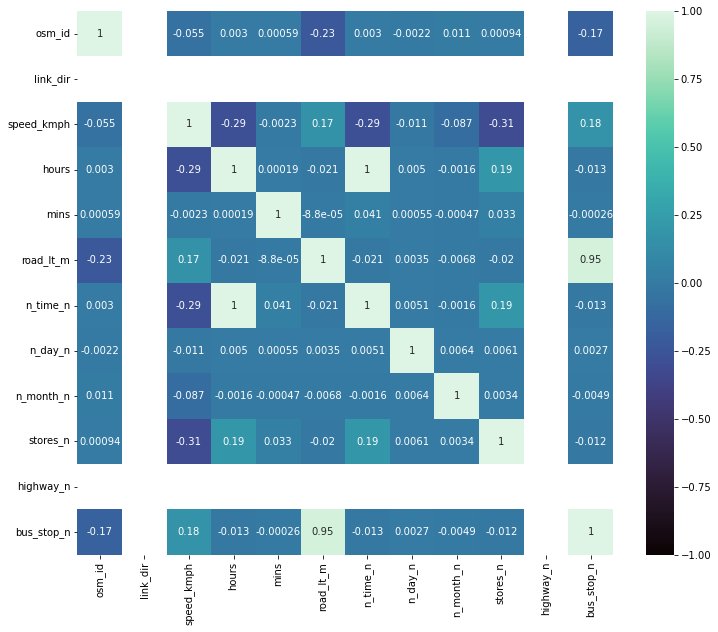

DATA INSPECTION RESULTS:
time values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 16 18 19 20 21 22 23
 24 25 26 27 29 28 30 31 32 34 33 35 36 38 37 39 40 41 43 42 44 45 46 47
 48 49 50 51 52 53 54 55 56 58 57 59 60 62 61 63 64 65 66 68 67 69 70 71
 72 74 73 75 76 77 78 80 79 81 82 84 83 85 86 87 88 90 89 92 91 93 94 95]
day values: [1 5 6 4 0 2 3]
stores values: [0 3 2 1]
link_dir values: [1]
highway values: ['primary']


Variance before scaler:
osm_id        1.952693e+16
hours         4.775802e+01
mins          2.815284e+02
n_day_n       3.996980e+00
n_month_n     1.243181e+01
stores_n      1.116239e+00
road_lt_m     1.159394e+04
bus_stop_n    1.298247e-01
dtype: float64


Variance after scaler:
osm_id        1.000007
hours         1.000007
mins          1.000007
n_day_n       1.000007
n_month_n     1.000007
stores_n      1.000007
road_lt_m     1.000007
bus_stop_n    1.000007
dtype: float64


          osm_id     hours      mins   n_day_n  n_month_n  stores_n  \
133311 -0.393

In [34]:
#train_X, val_X, train_y, val_y = preprocess_inputs(df)

# Training/Model Selection

In [468]:
models = {
    "                     Linear Regression": LinearRegression(),
    "                   K-Nearest Neighbors": KNeighborsRegressor(),
    "                        Neural Network": MLPRegressor(),
    "Support Vector Machine (Linear Kernel)": LinearSVR(),
    # "   Support Vector Machine (RBF Kernel)": SVR(),
    "                         Decision Tree": DecisionTreeRegressor(),
    "                         Random Forest": RandomForestRegressor(),
    "                     Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(train_X, train_y)
    print(name + " trained.")

                     Linear Regression trained.
                   K-Nearest Neighbors trained.
                        Neural Network trained.
Support Vector Machine (Linear Kernel) trained.
                         Decision Tree trained.
                         Random Forest trained.
                     Gradient Boosting trained.


# Results

Ref: https://www.kaggle.com/getting-started/27261
Every estimator or model in Scikit-learn has a score method after being trained on the data, usually X_train, y_train.

When you call score on classifiers like LogisticRegression, RandomForestClassifier, etc. the method computes the accuracy score by default (accuracy is #correct_preds / #all_preds). By default, the score method does not need the actual predictions.

##### Score method of regressors
When score is called on regressors, the coefficient of determination - R2 is calculated by default. As in classifiers, the score method is simply a shorthand to calculate R2 since it is commonly used to assess the performance of a regressor.

More on model evaluation: https://coderzcolumn.com/tutorials/machine-learning/model-evaluation-scoring-metrics-scikit-learn-sklearn

In [469]:
for name, model in models.items():
    print(name + " R^2 Score: {:.5f}".format(r2_score(val_y,model.predict(val_X))))
    print(name + " R^2 Score: {:.5f}".format(r2_score(train_y,model.predict(train_X))))

                     Linear Regression R^2 Score: 0.38032
                     Linear Regression R^2 Score: 0.29628
                   K-Nearest Neighbors R^2 Score: 0.28347
                   K-Nearest Neighbors R^2 Score: 0.47033
                        Neural Network R^2 Score: 0.41197
                        Neural Network R^2 Score: 0.34032
Support Vector Machine (Linear Kernel) R^2 Score: 0.38321
Support Vector Machine (Linear Kernel) R^2 Score: 0.28876
                         Decision Tree R^2 Score: -0.32291
                         Decision Tree R^2 Score: 0.99621
                         Random Forest R^2 Score: 0.33682
                         Random Forest R^2 Score: 0.89546
                     Gradient Boosting R^2 Score: 0.40933
                     Gradient Boosting R^2 Score: 0.34988


In [441]:
results = """
                     Linear Regression R^2 Score: 0.10552
                     Linear Regression R^2 Score: 0.12040
                   K-Nearest Neighbors R^2 Score: 0.33469
                   K-Nearest Neighbors R^2 Score: 0.56296
                        Neural Network R^2 Score: 0.39353
                        Neural Network R^2 Score: 0.41942
Support Vector Machine (Linear Kernel) R^2 Score: 0.10186
Support Vector Machine (Linear Kernel) R^2 Score: 0.11775
   Support Vector Machine (RBF Kernel) R^2 Score: 0.30791
   Support Vector Machine (RBF Kernel) R^2 Score: 0.33896
                         Decision Tree R^2 Score: 0.16801
                         Decision Tree R^2 Score: 0.65624
                         Random Forest R^2 Score: 0.27439
                         Random Forest R^2 Score: 0.64952
                     Gradient Boosting R^2 Score: 0.38747
                     Gradient Boosting R^2 Score: 0.40612
"""
print('Results with bus_stop feature: ', results)

Results with bus_stop feature:  
                     Linear Regression R^2 Score: 0.10552
                     Linear Regression R^2 Score: 0.12040
                   K-Nearest Neighbors R^2 Score: 0.33469
                   K-Nearest Neighbors R^2 Score: 0.56296
                        Neural Network R^2 Score: 0.39353
                        Neural Network R^2 Score: 0.41942
Support Vector Machine (Linear Kernel) R^2 Score: 0.10186
Support Vector Machine (Linear Kernel) R^2 Score: 0.11775
   Support Vector Machine (RBF Kernel) R^2 Score: 0.30791
   Support Vector Machine (RBF Kernel) R^2 Score: 0.33896
                         Decision Tree R^2 Score: 0.16801
                         Decision Tree R^2 Score: 0.65624
                         Random Forest R^2 Score: 0.27439
                         Random Forest R^2 Score: 0.64952
                     Gradient Boosting R^2 Score: 0.38747
                     Gradient Boosting R^2 Score: 0.40612



In [442]:
results = """
                     Linear Regression R^2 Score: 0.10938
                   K-Nearest Neighbors R^2 Score: 0.33238
                        Neural Network R^2 Score: -14.07604
Support Vector Machine (Linear Kernel) R^2 Score: -6.82171
   Support Vector Machine (RBF Kernel) R^2 Score: 0.04857
                         Decision Tree R^2 Score: 0.15332
                         Random Forest R^2 Score: 0.26139
                     Gradient Boosting R^2 Score: 0.38760
"""
print('Results before scalling: ', results)

Results before scalling:  
                     Linear Regression R^2 Score: 0.10938
                   K-Nearest Neighbors R^2 Score: 0.33238
                        Neural Network R^2 Score: -14.07604
Support Vector Machine (Linear Kernel) R^2 Score: -6.82171
   Support Vector Machine (RBF Kernel) R^2 Score: 0.04857
                         Decision Tree R^2 Score: 0.15332
                         Random Forest R^2 Score: 0.26139
                     Gradient Boosting R^2 Score: 0.38760



An alternative way to obtain r squared value

In [470]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

for name, model in models.items():
    val_predict = model.predict(val_X)
    print(name + " R^2 Score: {:.5f}".format(r2_score(val_y, val_predict)))
    print(name + " RMSE: {:.5f}".format(np.sqrt(mean_squared_error(val_y, val_predict))))
    print(name + " MAE: {:.5f}".format(mean_absolute_error(val_y, val_predict)))

                     Linear Regression R^2 Score: 0.38032
                     Linear Regression RMSE: 7.74979
                     Linear Regression MAE: 6.06667
                   K-Nearest Neighbors R^2 Score: 0.28347
                   K-Nearest Neighbors RMSE: 8.33344
                   K-Nearest Neighbors MAE: 6.52691
                        Neural Network R^2 Score: 0.41197
                        Neural Network RMSE: 7.54931
                        Neural Network MAE: 5.88162
Support Vector Machine (Linear Kernel) R^2 Score: 0.38321
Support Vector Machine (Linear Kernel) RMSE: 7.73174
Support Vector Machine (Linear Kernel) MAE: 6.00512
                         Decision Tree R^2 Score: -0.32291
                         Decision Tree RMSE: 11.32331
                         Decision Tree MAE: 8.75012
                         Random Forest R^2 Score: 0.33682
                         Random Forest RMSE: 8.01719
                         Random Forest MAE: 6.24389
                    